# <font color="#DE1509">Chi-Squared Test (Test of Independence)</font>

A chi-squared test (χ<sup>2</sup> test) is used to decide whether there is a relationship exists between two categorical variables of a sample.

H0 ตัวแปร A, B เป็นอิสระต่อกัน
H1 ตัวแปร A, B ไม่เป็นอิสระกัน

หรือ

H0: ไม่มีความสัมพันธ์ระหว่างตัวแปร A และ B
H1: มีความสัมพันธ์ระหว่างตัวแปร A และ B

In this exercise, we will perform χ<sup>2</sup> test based on 'Immunotherapy.csv' and 'titanic.csv' dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

&nbsp;    
#### <font color="#127C02">*Immunotherapy Dataset*</font>

In [2]:
df_immuno = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/Immunotherapy.csv")
df_immuno.head()

,gender,age,time,number_of_warts,type,area,induration_diameter,response
0,Female,15,1.75,1,Plantar,49,7,No
1,Female,38,2.50,1,Both,43,50,Yes
2,Female,24,4.25,1,common,174,30,Yes
3,Female,34,8.50,1,Plantar,163,7,No
4,Female,53,10.00,1,Plantar,30,25,Yes


&nbsp;    
#### <font color="#029DA3">**Adjust Data Type**</font>

In [3]:
df_immuno = df_immuno.astype({
    'gender': 'category',
    'type': 'category',
    'response': 'category'
})
df_immuno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               90 non-null     category
 1   age                  90 non-null     int64   
 2   time                 90 non-null     float64 
 3   number_of_warts      90 non-null     int64   
 4   type                 90 non-null     category
 5   area                 90 non-null     int64   
 6   induration_diameter  90 non-null     int64   
 7   response             90 non-null     category
dtypes: category(3), float64(1), int64(4)
memory usage: 4.3 KB


&nbsp;    
#### <font color="#029DA3">**Visualization of Categorical Data**</font>

<Axes: xlabel='gender', ylabel='count'>

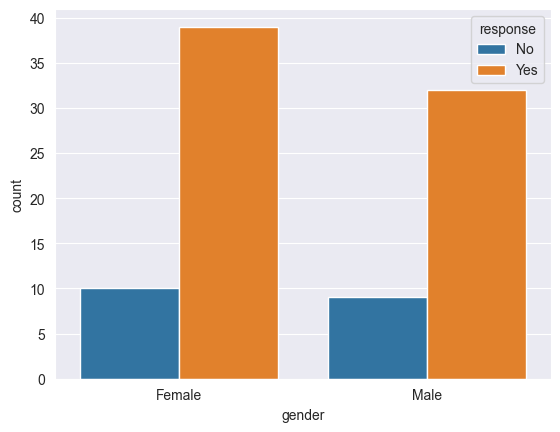

In [4]:
sns.countplot(data=df_immuno,
             x='gender',
             hue='response')

In [5]:
pd.crosstab(df_immuno.gender,
            df_immuno.response,
            margins=True)

response,No,Yes,All
gender,,,
Female,10,39,49
Male,9,32,41
All,19,71,90


<Axes: xlabel='type', ylabel='count'>

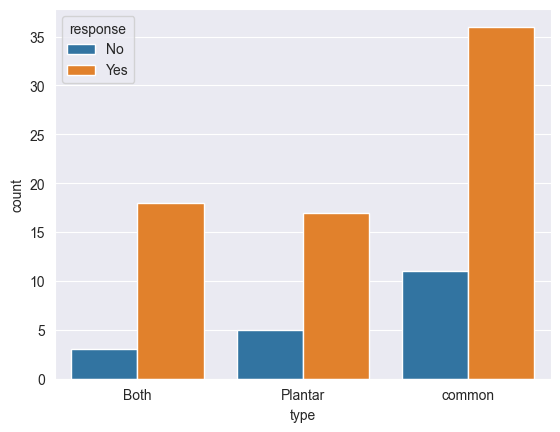

In [6]:
sns.countplot(data=df_immuno,
             x='type',
             hue='response')

In [7]:
pd.crosstab(df_immuno.type,
            df_immuno.response,
            margins=True)

response,No,Yes,All
type,,,
Both,3,18,21
Plantar,5,17,22
common,11,36,47
All,19,71,90


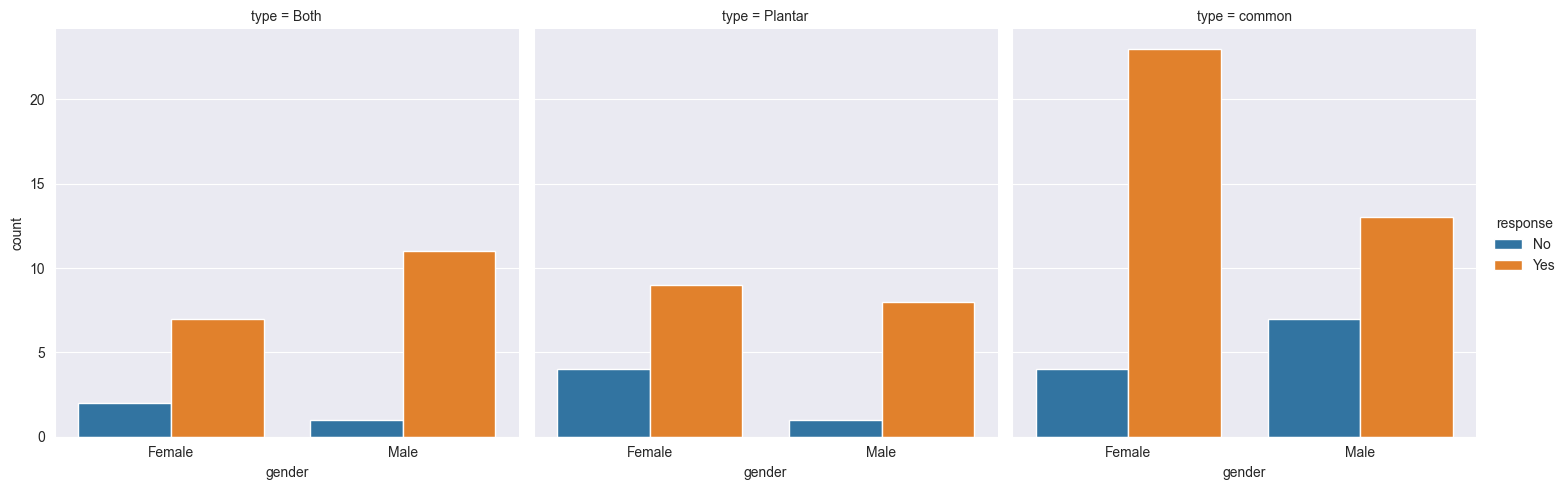

In [8]:
sns.catplot(data=df_immuno,
           kind='count',
           col='type',
           x='gender',
           hue='response')

&nbsp;    
#### <font color="#127C02">**Gender & Response**</font>

&NewLine;  
#### <font color="#029DA3">**Create Contingency Table**</font>

To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies.  

In [9]:
contab = pd.crosstab(df_immuno.gender,
                     df_immuno.response)
contab

response,No,Yes
gender,,
Female,10,39
Male,9,32


&nbsp;    
#### <font color="#029DA3">**Visualize Contingency Table**</font>

An easy way to visualize a contingency table is to draw a heatmap.

<Axes: xlabel='response', ylabel='gender'>

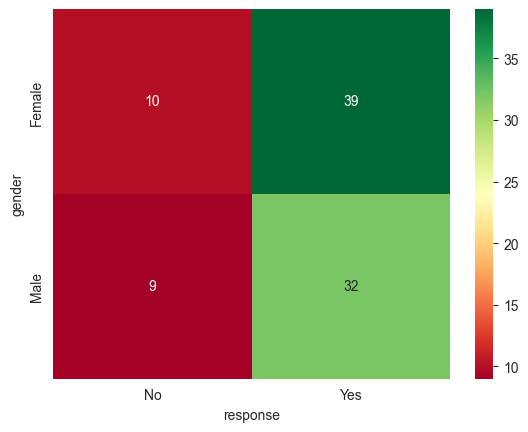

In [10]:
sns.heatmap(contab, annot=True, cmap='RdYlGn')

&nbsp;    
#### <font color="#029DA3">**Chi-Square Test**</font>

Now that we have built the contingency table, we can pass it to chi2_contingency() from the scipy library which returns:

- The test statistic (c)
- The p-value of the test (p)
- Degrees of freedom (dof)
- The expected frequencies, based on the marginal sums of the table (expected)

***Hypothesis***  
H<sub>0</sub>: the gender & response have *no relationship*  
H<sub>A</sub>: there is a relationship between gender & response

In [11]:
c, p, dof, expected = stats.chi2_contingency(contab)

In [12]:
print("p-value:", p)

p-value: 1.0


p-value > 0.05, fail to reject H<sub>0</sub>.  
The p-value is 1 which means that we do not reject the H<sub>0</sub> at 95% level of confidence.

\
Expected frequencies (no relationship):

<Axes: >

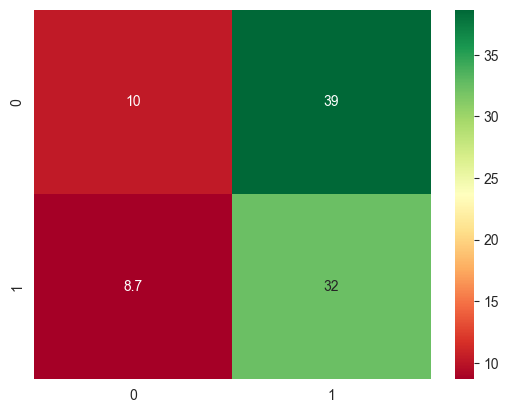

In [13]:
sns.heatmap(expected, annot=True, cmap='RdYlGn')

\
The expected value at row i and column j can be calculated using below equation.

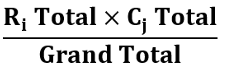

\
Let's see the contingency table again before calculating expected values.

In [14]:
pd.crosstab(df_immuno.gender,
            df_immuno.response,
            margins=True)

response,No,Yes,All
gender,,,
Female,10,39,49
Male,9,32,41
All,19,71,90


\
Now calculate expected value at gender=Female, response=No

In [15]:
(49*19)/90

10.344444444444445

\
Calculate expected value at gender=male, response=No

In [16]:
(41*19)/90

8.655555555555555

&nbsp;    
#### <font color="#127C02">**Type & Response**</font>

&NewLine;  
#### <font color="#029DA3">**Create Contingency Table**</font>

In [17]:
contab = pd.crosstab(df_immuno.type,
                     df_immuno.response)
contab

response,No,Yes
type,,
Both,3,18
Plantar,5,17
common,11,36


&NewLine;  
#### <font color="#029DA3">**Visualize Contingency Table**</font>

<Axes: xlabel='response', ylabel='type'>

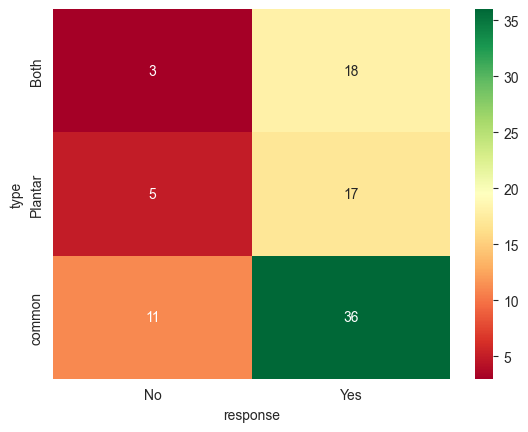

In [18]:
sns.heatmap(contab, annot=True, cmap='RdYlGn')

&NewLine;  
#### <font color="#029DA3">**Chi-Square Test**</font>

***Hypothesis***  
H<sub>0</sub>: the type & response variables have *no relationship*  
H<sub>A</sub>: there is a relationship between type & response variables

In [19]:
c, p, dof, expected = stats.chi2_contingency(contab)

In [20]:
print("p-value:", p)

p-value: 0.6803408056744953


p-value > 0.05, fail to reject H<sub>0</sub>.
p-value > 0.05 ยอมรับสมมุติฐานหลัก ปฏิเสธสมมุติฐานรอง
The p-value is 1 which means that we do not reject the H<sub>0</sub> at 95% level of confidence.

\
Expected frequencies:

<Axes: >

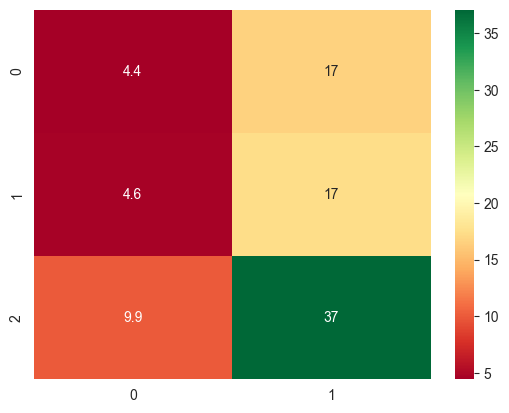

In [21]:
sns.heatmap(expected, annot=True, cmap='RdYlGn')

&nbsp;    
#### <font color="#127C02">*Titanic Dataset*</font>

In [22]:
df_titan = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/titanic.csv")
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


&NewLine;  
#### <font color="#029DA3">**Adjust Data Type**</font>

In [23]:
df_titan = df_titan.astype({
    'Survived': 'category',
    'Pclass': 'category',
    'Sex': 'category',
    'Cabin': 'category',
    'Embarked': 'category'
})
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(3), object(2)
memory usage: 59.8+ KB


&nbsp;    
#### <font color="#127C02">**Gender & Survived**</font>

&NewLine;  
#### <font color="#029DA3">**Create Contingency Table**</font>

In [24]:
contab = pd.crosstab(df_titan.Sex,
                     df_titan.Survived,)
contab

Survived,0,1
Sex,,
female,81,233
male,468,109


&NewLine;  
#### <font color="#029DA3">**Visualize Contingency Table**</font>

<Axes: xlabel='Survived', ylabel='Sex'>

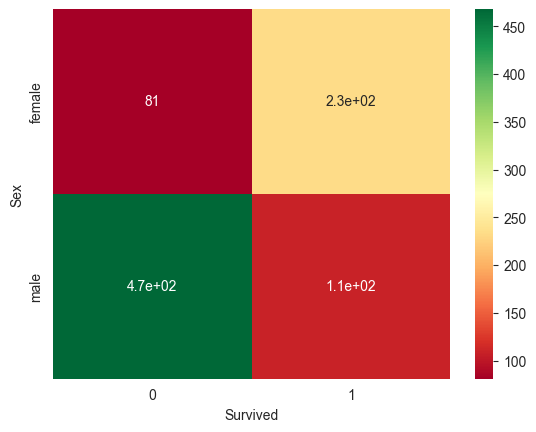

In [25]:
sns.heatmap(contab, annot=True, cmap='RdYlGn')

&NewLine;  
#### <font color="#029DA3">**Chi-Square Test**</font>

***Hypothesis***  
H<sub>0</sub>: the gender & survived variables have *no relationship*  
H<sub>A</sub>: there is a relationship between gender & survived variables

In [26]:
c, p, dof, expected = stats.chi2_contingency(contab)

In [27]:
print("p-value:", p)

p-value: 1.1973570627755645e-58


p-value <= 0.05, reject H<sub>0</sub>, accept H<sub>A</sub>.
ปฏิเสธสมมุติฐานหลัก ยอมรับสมมุติฐานรอง

\
Expected frequencies:

<Axes: >

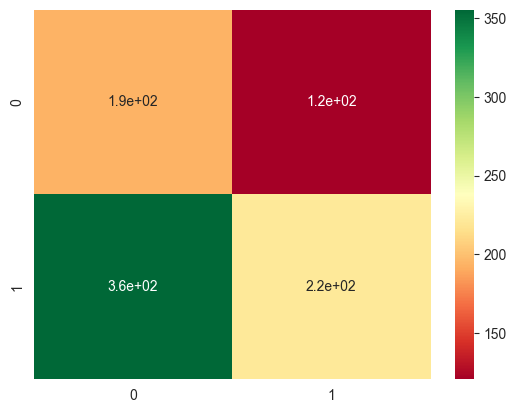

In [28]:
sns.heatmap(expected, annot=True, cmap='RdYlGn')

####  
#### <font color="#127C02">**Pclass & Survived**</font>

&NewLine;  
#### <font color="#029DA3">**Create Contingency Table**</font>

In [29]:
contab = pd.crosstab(df_titan.Pclass,
                     df_titan.Survived)
contab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


&NewLine;  
#### <font color="#029DA3">**Visualize Contingency Table**</font>

<Axes: xlabel='Survived', ylabel='Pclass'>

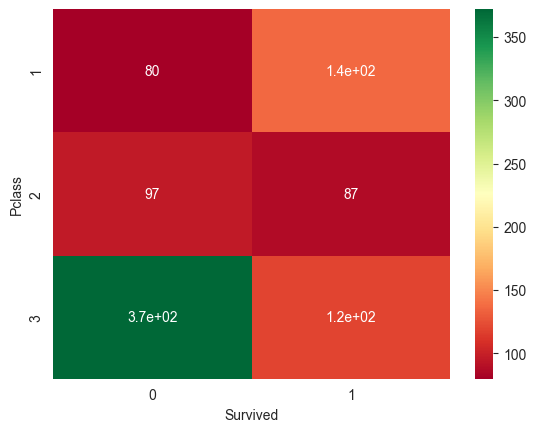

In [30]:
sns.heatmap(contab, annot=True, cmap='RdYlGn')

&NewLine;  
#### <font color="#029DA3">**Chi-Square Test**</font>

***Hypothesis***  
H<sub>0</sub>: the pclass & survived variables have *no relationship*  
H<sub>A</sub>: there is a relationship between pclass & survived variables

In [31]:
c, p, dof, expected = stats.chi2_contingency(contab)

In [32]:
print("p-value:", p)

p-value: 4.549251711298793e-23


p-value <= 0.05, reject H<sub>0</sub>, accept H<sub>A</sub>.   

&nbsp;    
Expected frequencies:

<Axes: >

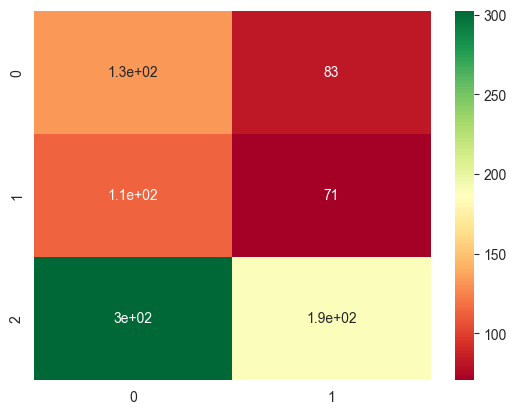

In [33]:
sns.heatmap(expected, annot=True, cmap='RdYlGn')